# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Damian Marvel
- **Email:** marveldamian@gmail.com
- **ID Dicoding:** damianmarvel

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda berubah sepanjang waktu, berdasarkan jam, hari, bulan, tahun, dan musim?
- Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# Membaca data csv menggunakan library pandas
bike_data_hour =  pd.read_csv('Bike-sharing-dataset/hour.csv')
bike_data_day =  pd.read_csv('Bike-sharing-dataset/day.csv')

In [5]:
bike_data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
bike_data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data dari bike_data_hour dan bike_data_day mirip dan sebenarnya sama. Perbedaannya terletak pada interval waktu pengumpulan data, di mana bike_data_hour mencatat informasi setiap jam, sementara bike_data_day mencatatnya setiap hari.

### Assessing Data

In [7]:
bike_data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
bike_data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari kedua dataset tersebut, terlihat bahwa bike_data_day memiliki 731 baris, sementara bike_data_hour memiliki 17379 baris. Saya asumsikan bahwa beberapa baris mungkin hilang, karena seharusnya untuk 731 hari, total baris yang diharapkan adalah 17544 (dikali 24). Mengenai hal ini, saya akan analisis lebih dalam lagi.

Selain itu, untuk mempermudah analisis, diperlukan konversi tipe data pada kolom dteday menjadi tipe datetime, mengingat tipe data tersebut.

In [6]:
bike_data_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
bike_data_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kabar baiknya, tidak ada data yang bernilai null/ na.

In [12]:
bike_data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
bike_data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



Dengan menggunakan operasi describe, dapat diamati beberapa statistik menarik. Rata-rata penyewaan sepeda per jam adalah 189 orang, dan per hari adalah 4504 orang. Median penyewaan per jam adalah 142 orang, dan per hari adalah 4548 orang.

Ketika memperhatikan perbedaan yang signifikan antara mean dan median, terlihat adanya indikasi adanya banyak nilai ekstrem (outliers) dalam data penyewaan sepeda per jam.

In [21]:
# Mengecek apakah data hour memiliki 24 row untuk tiap harinya
result = bike_data_hour.groupby('dteday')['instant'].count()

days_with_less_than_24_values = result[result < 24]

print(days_with_less_than_24_values)

dteday
2011-01-02    23
2011-01-03    22
2011-01-04    23
2011-01-05    23
2011-01-06    23
              ..
2012-10-30    11
2012-11-08    23
2012-11-29    23
2012-12-24    23
2012-12-25    23
Name: instant, Length: 76, dtype: int64



Dengan mengikuti asumsi sebelumnya, memang terlihat adanya kehilangan data, terutama pada hari-hari yang memiliki kurang dari 24 baris (seperti pada jam 11, 22, dan 23). Seharusnya, penanganan data yang hilang dapat dilakukan dengan menambahkan data yang diperlukan, misalnya, dengan menggantinya menggunakan nilai dari jam sebelumnya. Namun, mengingat kompleksitas masalah tersebut, saya memilih untuk mengabaikannya saja :D.

### Cleaning Data

In [9]:
# Mengkonversikan tipe object menjadi tipe datetime
bike_data_day['dteday'] = pd.to_datetime(bike_data_day['dteday'])
bike_data_hour['dteday'] = pd.to_datetime(bike_data_hour['dteday'])

## Exploratory Data Analysis (EDA)

### Explore weather situation dan musim

In [80]:
bike_data_hour.groupby('weathersit')['cnt'].sum()

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<br>
<br>
Sesuai dengan dugaan bahwa di kondisi cuaca yang baik terdapat lebih banyak orang yang menyewa sepeda dibandingkan kondisi cuaca yang buruk.

In [13]:
bike_data_hour.groupby('season')['cnt'].sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

season : season (1:springer, 2:summer, 3:fall, 4:winter)
Terdapat kecenderungan bahwa penyewaan sepeda lebih tinggi selama musim gugur, diikuti oleh musim panas, musim dingin, dan musim semi.

### Explore pengguna casual dan registered

In [19]:
user = bike_data_hour.groupby(['yr','mnth'])[['casual','registered']].sum()

In [20]:
# Menghitung presentase antara pengguna registered dibagi dengan pengguna total (casual+ registered)
user = bike_data_hour.groupby(['yr','mnth'])[['casual','registered']].sum()

user['percentage_registered'] = (user['registered'] / (user['casual'] + user['registered'])) * 100

user

casual  registered  percentage_registered
yr mnth                                           
0  1       3073       35116              91.953180
   2       6242       41973              87.053821
   3      12826       51219              79.973456
   4      22346       72524              76.445662
   5      31050      104771              77.139029
   6      30612      112900              78.669380
   7      36452      104889              74.209890
   8      28842      107849              78.899854
   9      26545      100873              79.166994
   10     25222       98289              79.579147
   11     15594       86573              84.736755
   12      8448       78875              90.325573
1  1       8969       87775              90.729141
   2       8721       94416              91.544257
   3      31618      133257              80.823048
   4      38456      135768              77.927266
   5      44235      151630              77.415567
   6      43294      159536              78.655031
   7      41705      161902              79.516912
   8      43197      171306              79.861820
   9      43778      174795              79.970994
   10     34538      164303              82.630343
   11     21009      131655              86.238406
   12     13245      110468              89.293769

Pada awalnya, saya berasumsi bahwa persentase pengguna terdaftar (registered) akan terus meningkat seiring berjalannya waktu, menandakan bahwa lebih banyak penyewa akan menjadi pengguna terdaftar seiring waktu. Namun, ternyata persentase tersebut tidak menunjukkan tren peningkatan atau penurunan sejalan dengan waktu.

### Explore jumlah hari pada 2 tahun

In [32]:
bike_data_day.groupby('yr')['instant'].count()

yr
0    365
1    366
Name: instant, dtype: int64

Bisa dilihat bahwa di tahun 2011 terdapat 365 hari dan di tahun 2011 terdapat 366 hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

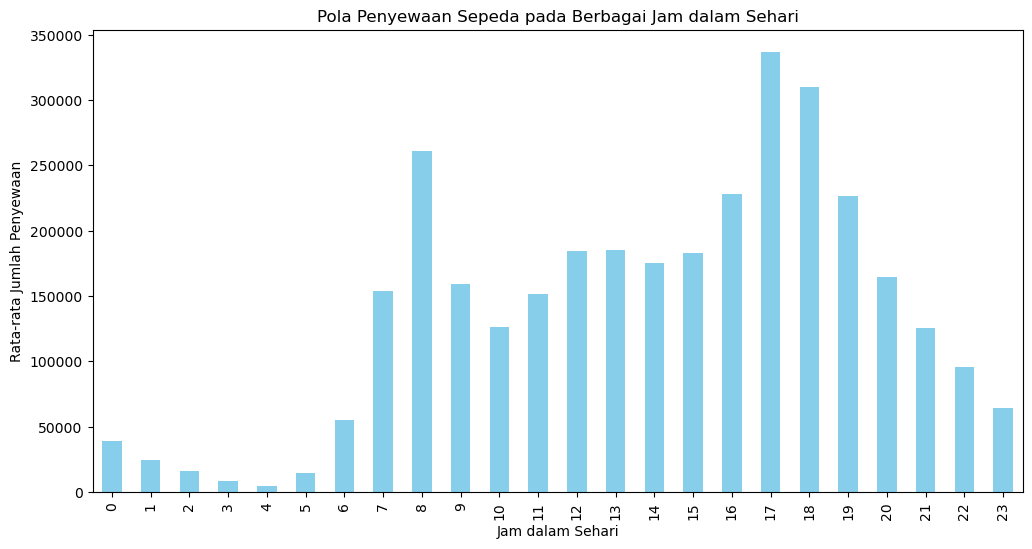

In [76]:
# Plot pola penyewaan pada berbagai jam dalam sehari
plt.figure(figsize=(12, 6))
hourly_trend = bike_data_hour.groupby('hr')['cnt'].sum()
hourly_trend.plot(kind='bar', color='skyblue')
plt.title('Pola Penyewaan Sepeda pada Berbagai Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

Dari data di atas, terlihat bahwa jumlah penyewa sepeda cenderung rendah antara jam 0 hingga 6, yang merupakan hal yang wajar karena sebagian besar orang beristirahat pada periode tersebut. Setelah jam 7-8, terjadi peningkatan jumlah penyewa, dan dari jam 9 hingga 16, jumlahnya cenderung stagnan. Puncak aktivitas terjadi pada jam 17-18, dengan jumlah penyewa terbanyak pada kedua jam tersebut. Kemudian, dari jam 19 hingga 23, terjadi penurunan jumlah penyewa secara perlahan.
<br>
Dengan melihat pola tersebut, terdapat indikasi bahwa jumlah penyewa cenderung meningkat pada jam awal kerja dan jam pulang kerja. Meskipun demikian, bahwa ini mungkin saja kebetulan sehingga diperlukan analisis lebih mendalam untuk memastikan pola tersebut.


In [85]:
bike_data_day['day_of_week'] = bike_data_day['dteday'].dt.day_name()

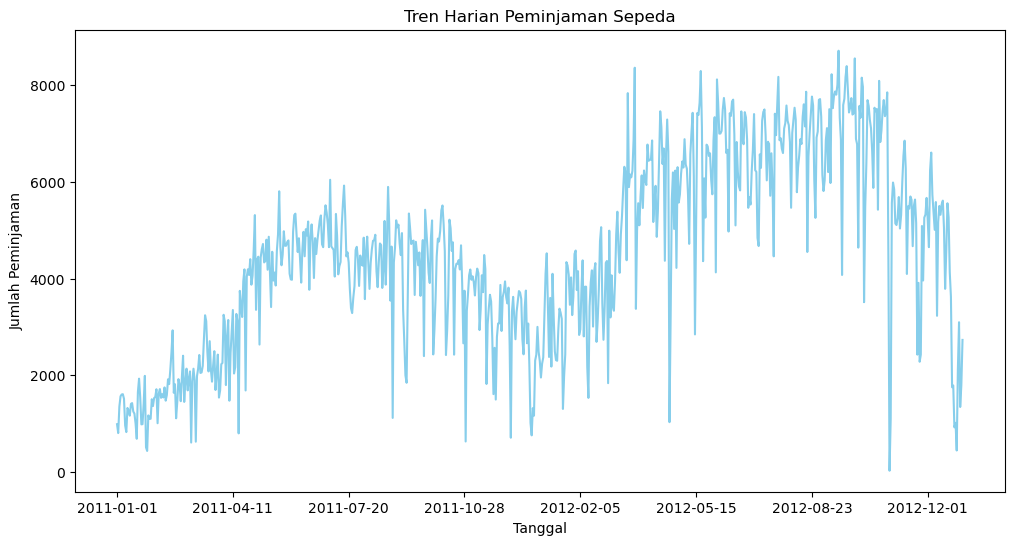

In [27]:
# Plot tren harian
plt.figure(figsize=(12, 6))
daily_trend = bike_data_day.groupby('dteday')['cnt'].sum()
daily_trend.plot(color='skyblue')
plt.title('Tren Harian Penyewaan Sepeda')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Dari grafik tersebut, terlihat bahwa jumlah penyewa pada tahun 2012 cenderung lebih tinggi dibandingkan dengan tahun 2011. Pola umum yang terlihat mirip di kedua tahun tersebut adalah rendahnya jumlah penyewa di kuartal pertama, kemudian peningkatan di kuartal kedua dan ketiga, diikuti oleh penurunan di kuartal keempat. Penting untuk dicatat bahwa terdapat penurunan yang sangat signifikan di kuartal keempat tahun 2012, sehingga diperlukan analisis lebih lanjut untuk memahami penyebab penurunan tersebut.

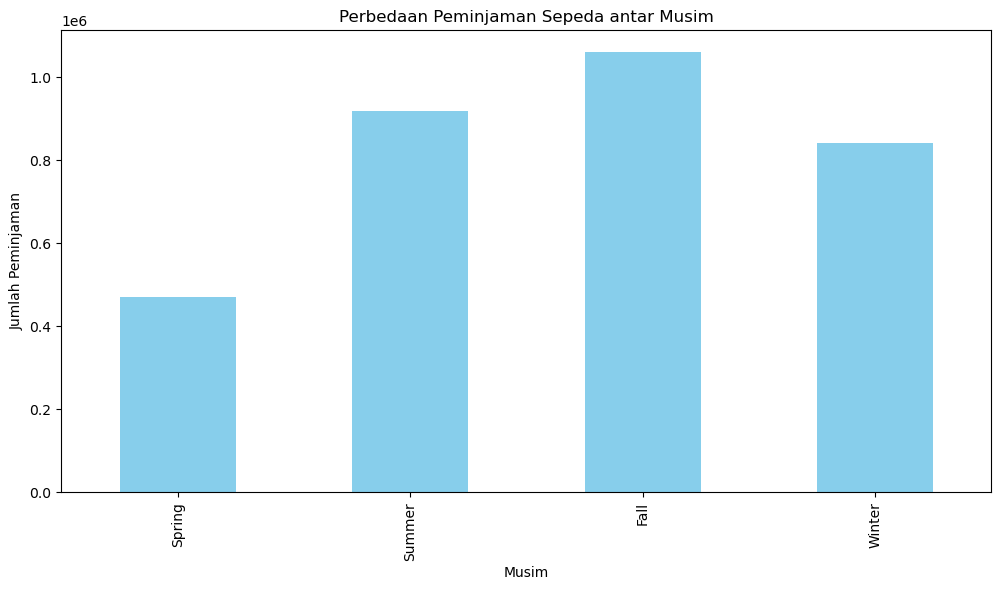

In [26]:
# Plot perbedaan antar musim
plt.figure(figsize=(12, 6))
seasonal_diff = bike_data_day.groupby('season')['cnt'].sum()
seasonal_diff.index = ['Spring', 'Summer', 'Fall', 'Winter']
seasonal_diff.plot(kind='bar', color='skyblue')
plt.title('Perbedaan Penyewaan Sepeda antar Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

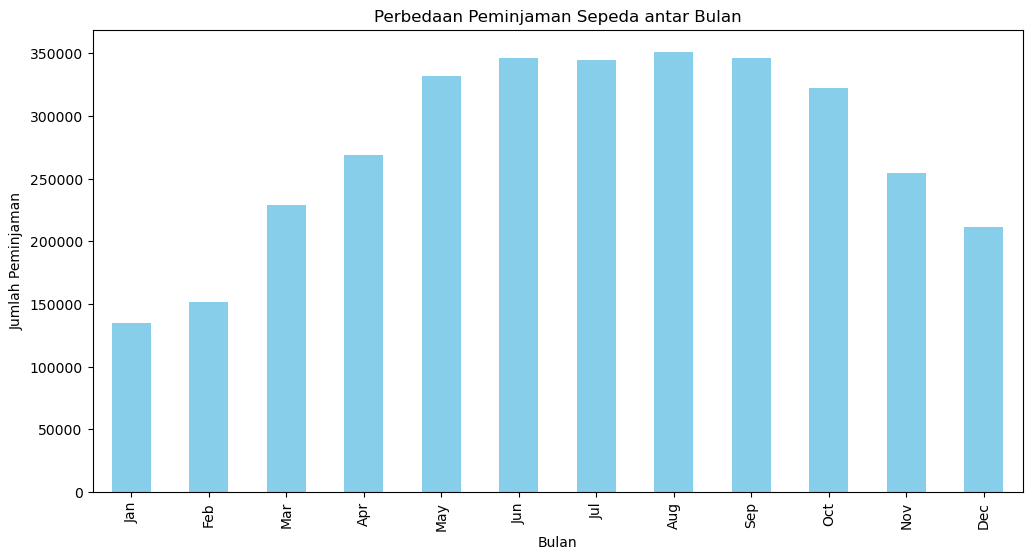

In [90]:
# Plot perbedaan antar bulan
plt.figure(figsize=(12, 6))
monthly_diff = bike_data_day.groupby('mnth')['cnt'].sum()
monthly_diff.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_diff.plot(kind='bar', color='skyblue')
plt.title('Perbedaan Penyewaan Sepeda antar Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Pernyataan sebelumnya juga sesuai dengan plot penyewaan antar musim dan antar bulanan, yang menunjukkan peningkatan di kuartal 2 dan 3, lalu diikuti dengan penurunan di kuartal 4. 

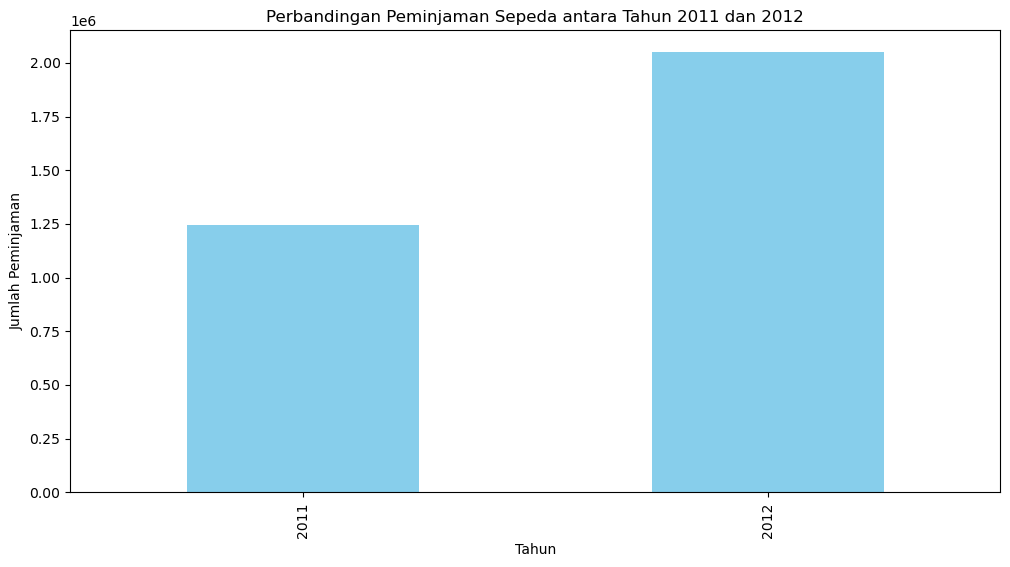

In [28]:
# Plot perbandingan antara tahun 2011 dan 2012
plt.figure(figsize=(12, 6))
yearly_comparison = bike_data_day.groupby('yr')['cnt'].sum()
yearly_comparison.index = ['2011', '2012']
yearly_comparison.plot(kind='bar', color='skyblue')
plt.title('Perbandingan Penyewaan Sepeda antara Tahun 2011 dan 2012')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Berdasarkan plot diatas juga menunjukkan bahwa terjadi peningkatan jumlah penyewa sepeda dari tahun 2011 ke tahun 2012.

### Pertanyaan 2:

In [37]:
# Memfilter column yang dibutuhkan untuk membuat matriks korelasi
weather_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
weather_data = bike_data_day[weather_columns]

# Menghitung korelasi antara cuaca dan jumlah penyewaan
correlation_matrix = weather_data.corr()

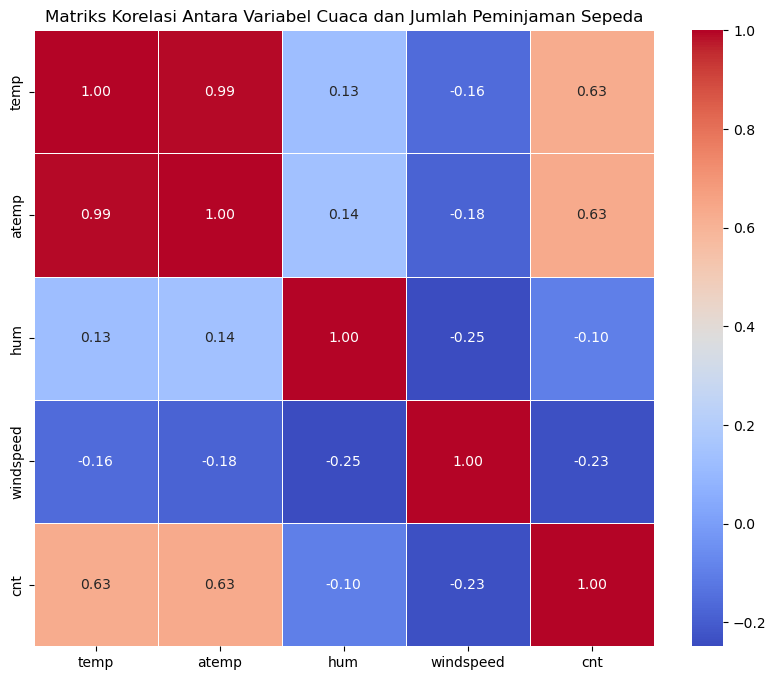

In [38]:
# Plot matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antara Variabel Cuaca dan Jumlah Penyewaan Sepeda')
plt.show()


Berdasarkan matriks korelasi di atas, terlihat bahwa temperatur dan feeling temperature menunjukkan korelasi yang cukup tinggi dengan koefisien 0.63. Hal ini menunjukkan adanya hubungan linear positif antara suhu dan suhu perasaan dengan jumlah penyewa sepeda. Sementara itu, kelembapan (humidity) dan kecepatan angin (windspeed) tidak menunjukkan hubungan yang signifikan dengan jumlah penyewa.

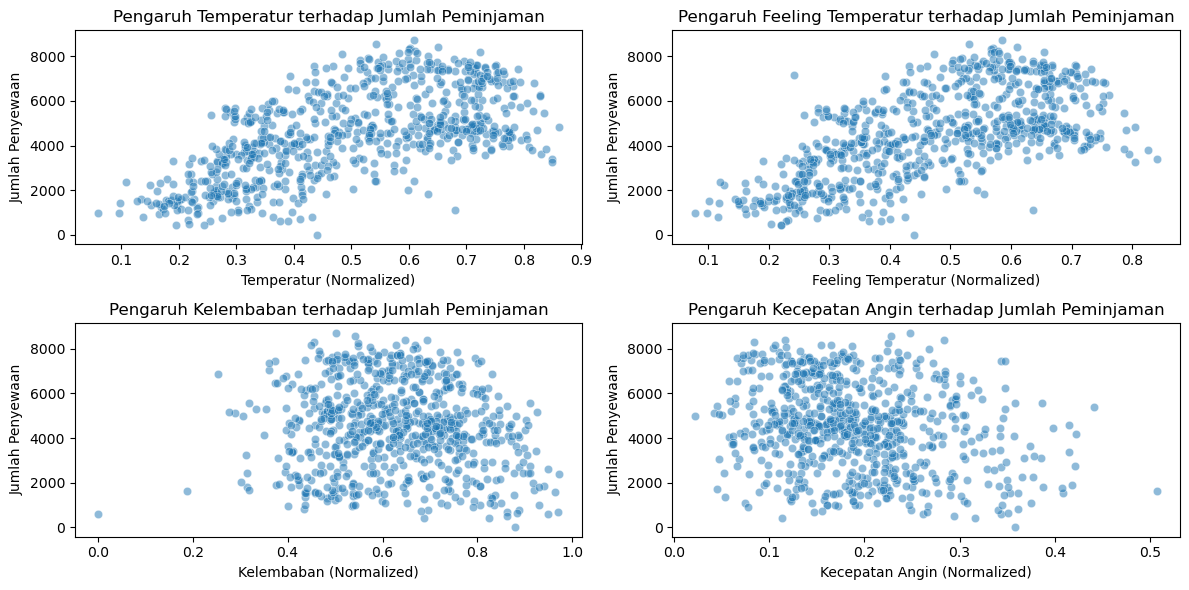

In [40]:
# Analisis perbedaan kondisi cuaca terhadap jumlah penyewaan
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(x='temp', y='cnt', data=bike_data_day, alpha=0.5)
plt.title('Pengaruh Temperatur terhadap Jumlah Penyewaan')
plt.xlabel('Temperatur (Normalized)')
plt.ylabel('Jumlah Penyewaan')

plt.subplot(2, 2, 2)
sns.scatterplot(x='atemp', y='cnt', data=bike_data_day, alpha=0.5)
plt.title('Pengaruh Feeling Temperatur terhadap Jumlah Penyewaan')
plt.xlabel('Feeling Temperatur (Normalized)')
plt.ylabel('Jumlah Penyewaan')

plt.subplot(2, 2, 3)
sns.scatterplot(x='hum', y='cnt', data=bike_data_day, alpha=0.5)
plt.title('Pengaruh Kelembaban terhadap Jumlah Penyewaan')
plt.xlabel('Kelembaban (Normalized)')
plt.ylabel('Jumlah Penyewaan')

plt.subplot(2, 2, 4)
sns.scatterplot(x='windspeed', y='cnt', data=bike_data_day, alpha=0.5)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Penyewaan')
plt.xlabel('Kecepatan Angin (Normalized)')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()



Dari scatterplot, terlihat bahwa grafik temperatur dan feeling temperature menunjukkan pola yang jelas dengan garis diagonal yang memiliki gradien positif. Ini menandakan adanya hubungan linear positif antara kedua variabel tersebut dan jumlah penyewa sepeda. Sementara itu, pada grafik humidity dan windspeed, tidak terlihat pola yang jelas karena titik-titiknya tersebar secara acak.

### Analisis Lanjutan

Berdasarkan saran keempat, saya disuruh menggunakan teknis analisis lanjutan seperti RFM analysis, geoanalysis, clustering, dll. Namun melihat dataset yang ada, saya rasa saya tidak bisa menggunakan RFM analysis karena data ini bukan mengenai data tiap customer. Selain itu saya juga tidak bisa menggunakan geoanalysis, karena tidak ada data geografi sama sekali. Oleh karena itu saya akan mencoba untuk menggunakan cluster analysis tanpa menggunakan machine learning. Disini saya akan mencoba untuk mengkategorikan tipe hari berdasarkan temperatur menjadi Cold, Moderate, dan Hot.

In [58]:
# Mengubah ke temperatur yang aslinya sebelum dinormalisasikan
bike_data_day['temp_normal'] = bike_data_day['temp']*41

In [61]:
# Membuat column temperature_category berdasarkan percentil
cold_percentile = bike_data_day['temp_normal'].quantile(0.25)
moderate_percentile = bike_data_day['temp_normal'].quantile(0.75)

bike_data_day['temperature_category'] = pd.cut(bike_data_day['temp_normal'], bins=[-float('inf'), cold_percentile, moderate_percentile, float('inf')],
                                              labels=['Cold', 'Moderate', 'Hot'])

bike_data_day[['temp_normal', 'temperature_category']]

,temp_normal,temperature_category
0,14.110847,Moderate
1,14.902598,Moderate
2,8.050924,Cold
3,8.200000,Cold
4,9.305237,Cold
...,...,...
726,10.420847,Cold
727,10.386653,Cold
728,10.386653,Cold
729,10.489153,Cold


Clustering ini dilakukan berdasarkan persentil yang akan membaginya seperti dibawah.
- Cold: Rentang dari -∞ hingga nilai persentil ke-25 (Q1).
- Moderate: Rentang dari nilai persentil ke-25 (Q1) hingga nilai persentil ke-75 (Q3).
- Hot: Rentang dari nilai persentil ke-75 (Q3) hingga ∞.

In [63]:
# Melihat rentang minimal dan maximal tiap kategori
range_data = bike_data_day.groupby('temperature_category')['temp_normal'].agg(['min', 'max'])

range_data

,min,max
temperature_category,,
Cold,2.424346,13.803347
Moderate,13.837500,26.855000
Hot,26.889153,35.328347


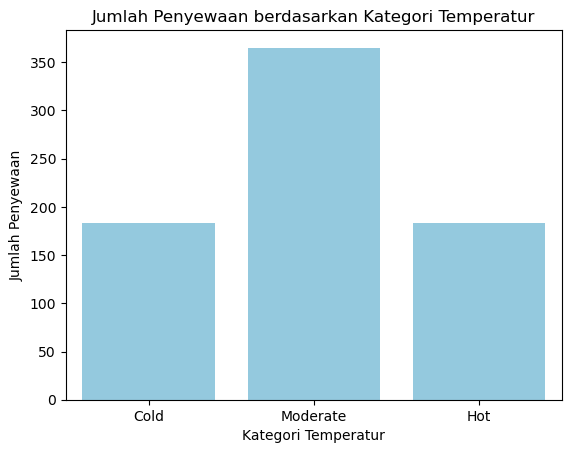

In [71]:
# Plot mpenyewaan berdasarkan kategori temperatur
sns.countplot(x='temperature_category', data=bike_data_day, color='skyblue')
plt.title('Jumlah Penyewaan berdasarkan Kategori Temperatur')
plt.xlabel('Kategori Temperatur')
plt.ylabel('Jumlah Penyewaan')
plt.show()


Dari grafik di atas, terlihat bahwa kategori moderate memiliki jumlah penyewaan paling tinggi dan secara signifikan melampaui kategori cold dan hot. Fenomena ini dapat dijelaskan dengan baik karena temperatur yang moderat umumnya dianggap paling ideal untuk kegiatan penyewaan sepeda.

## Conclusion

- Bagaimana pola penyewaan sepeda berubah sepanjang waktu, berdasarkan jam, hari, bulan, tahun, dan musim?
<br>

Dari pola penyewaan berdasarkan jam, terlihat bahwa terdapat dua puncak, yang pertama terjadi pada jam 8, dan yang kedua pada jam 17. Jumlah penyewa cenderung tinggi dalam rentang waktu jam 7-22, menunjukkan tingginya aktivitas penyewaan sepeda pada periode tersebut.

Pola harian juga menunjukkan kenaikan di kuartal 2 dan 3, diikuti oleh penurunan di kuartal 4. Meskipun diperlukan analisis lebih lanjut untuk memahami penyebabnya, kemungkinan faktor seperti musim, kondisi cuaca, dan temperatur dapat berpengaruh. Selain itu, terlihat bahwa tahun 2012 memiliki jumlah penyewa yang lebih tinggi dibandingkan dengan tahun 2011. Namun, penurunan drastis yang terlihat pada kuartal 4 tahun 2012 memerlukan perhatian khusus untuk menganalisis penyebabnya.
- Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?
<br>

Dari plot matriks korelasi dan scatterplot, dapat disimpulkan bahwa hanya temperatur dan feeling temperatur yang memiliki pengaruh yang signifikan terhadap jumlah penyewa sepeda. Artinya, ketika temperatur meningkat, jumlah penyewa sepeda juga cenderung meningkat. Selain temperatur, terlihat bahwa kelembapan dan kecepatan angin tidak berpengaruh signifikan terhadap jumlah penyewa sepeda.